## Heart Disease Clustering

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes but, in this lab, we will only use 4 of them. These are:

1. age (Age of the patient in years).
2. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)).
3. chol (serum cholesterol in mg/dl).
4. thalach: maximum heart rate achieved.

Link to dataset describtion from UCI: https://archive.ics.uci.edu/dataset/45/heart+disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Create a function to load the heart disease dataset

def load_heart_disease():
    '''Load and pre-process heart disease data

    if processed.hungarian.data file is not present.

    it will be downloaded from
    https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

    return: data(DataFrame)

    '''

    import os
    import requests


    file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
    file_name = file_url.split('/')[-1]

    if not os.path.isfile(file_name):
        print('Downloading from {}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)

    data = pd.read_csv(file_name,
                   na_values='?',
                   names=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                            'ca', 'thal', 'num'])

    data = data[['age', 'trestbps', 'chol', 'thalach']] # we will use these fatures only
    data = data.dropna()

    return data

In [5]:
# Create a dataframe and load the dataset into it.
df = load_heart_disease()

# Check the dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   trestbps  270 non-null    float64
 2   chol      270 non-null    float64
 3   thalach   270 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.5 KB
None


In [7]:
# Use .describe to show some statistics of the data
df_description = df.describe()
print(df_description)

              age    trestbps        chol     thalach
count  270.000000  270.000000  270.000000  270.000000
mean    47.777778  132.488889  250.637037  139.155556
std      7.803980   17.563635   67.693394   23.486251
min     28.000000   92.000000   85.000000   82.000000
25%     42.000000  120.000000  209.000000  122.000000
50%     49.000000  130.000000  243.000000  140.000000
75%     54.000000  140.000000  281.750000  155.000000
max     65.000000  200.000000  603.000000  190.000000


c:\Users\taimo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


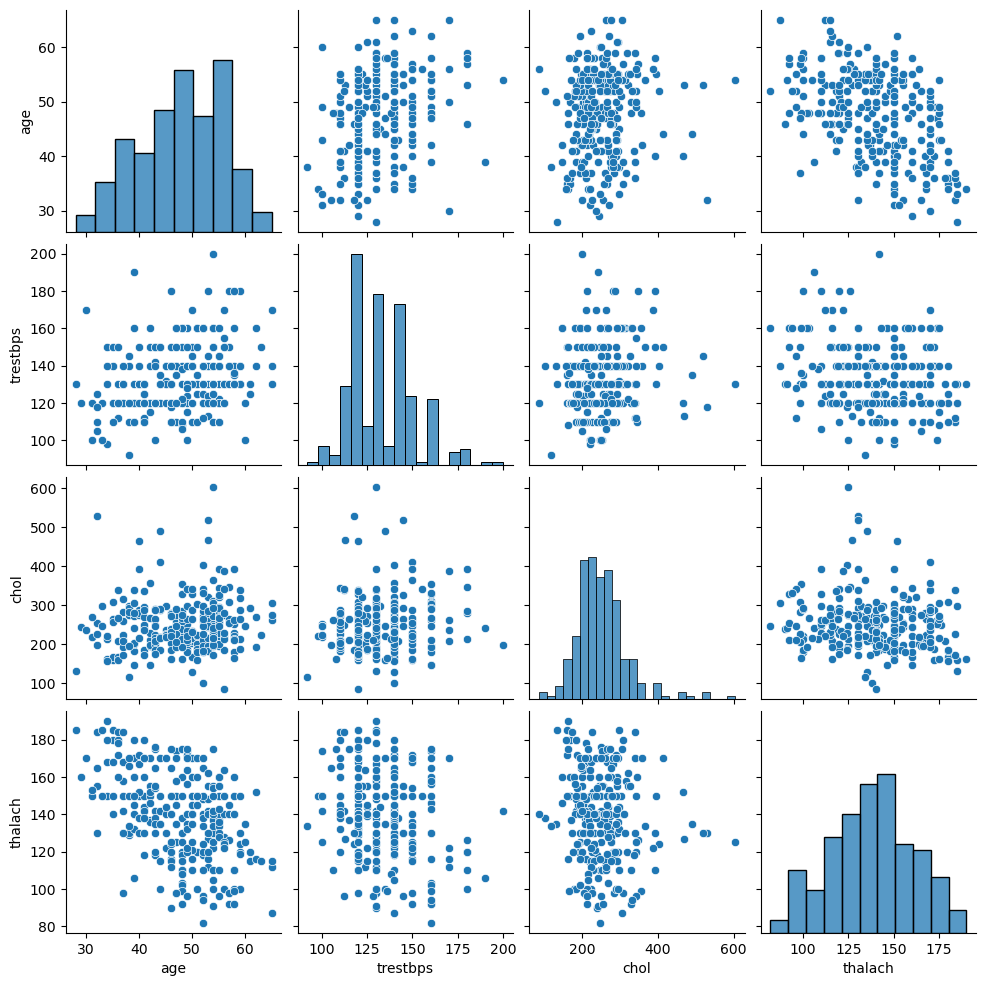

Ellipsis

In [8]:
# Use pairplot from seaborn to see the how the features are distributed against each other
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(df)
plt.show()
...

## K-means clustering

There are a few questions that we must answer before we start clustering:

1. Do we need to process the data first?
1. How many clusters should we use?
1. Which method should we use?

In [9]:
# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
# Assuming df is the original dataframe
df_scaled = df.copy()  # Make a copy of the original dataframe

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the df_scaled using the scaler
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])

# Create a dataframe with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

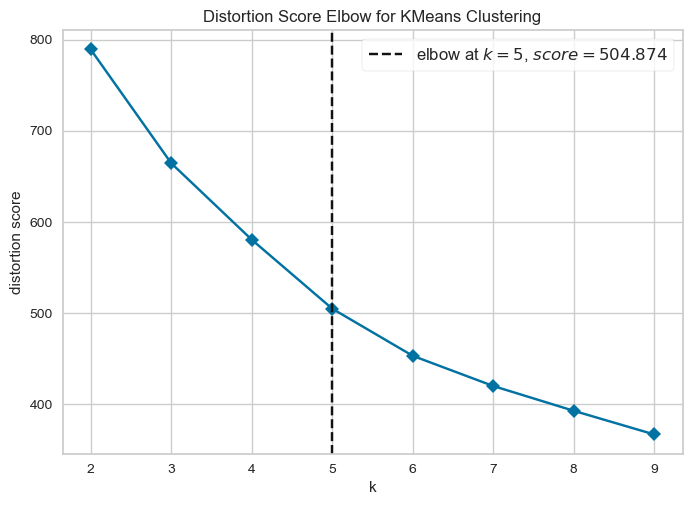

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Use the kelbow visualizer to check how many clusters we have (use the scaled data). Use metric='distortion'
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Assuming df_scaled is the scaled dataframe
X = df_scaled.values  # Convert the DataFrame to a numpy array

# Initialize the KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the metric 'distortion'
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='distortion', timings=False
)

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()

c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

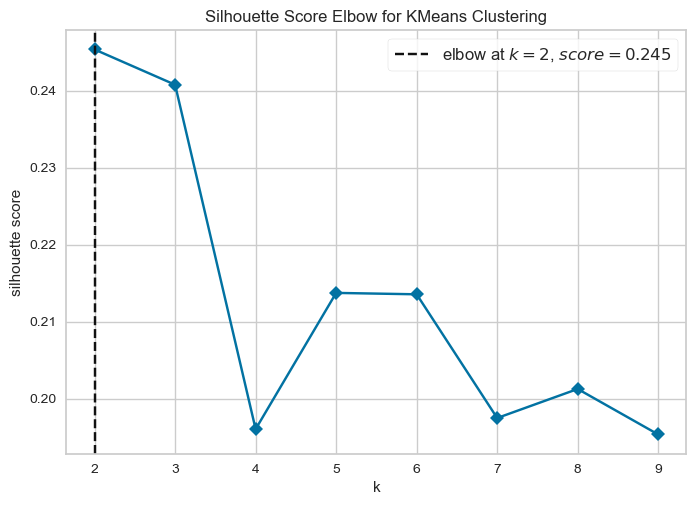

Ellipsis

In [13]:
# Use the kelbow visualizer to check how many clusters we have. Use metric='silhouette'
X = df_scaled.values  # Convert the DataFrame to a numpy array

# Initialize the KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the metric 'silhouette'
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='silhouette', timings=False
)

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()
...

c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

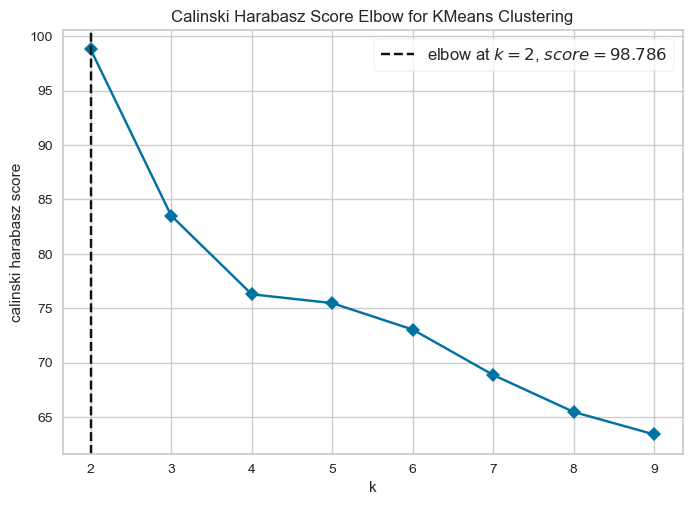

Ellipsis

In [14]:
# Use the kelbow visualizer to check how many clusters we have. Use metric='calinski_harabasz'
X = df_scaled.values  # Convert the DataFrame to a numpy array

# Initialize the KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the metric 'calinski_harabasz'
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='calinski_harabasz', timings=False
)

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()
...

In [15]:
# Apply the k-means clustering technique on the scaled data. Use any number of clusters between 2-5 clusters. I will be using 3 clusters. Use random_state = 54.
from sklearn.cluster import KMeans
...

# Initialize KMeans with 3 clusters and random_state=54
kmeans = KMeans(n_clusters=3, random_state=54)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)
...

# Add a column to the dataframe 'df' called 'clusters' and assign kmeans.labels_ to it.
df['clusters'] = ...
# Convert the clusters column to category data type.
df['clusters'] = ... #makes seaborn use qualitative color palette

c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taimo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
# check the dtypes of the dataframe 'df'
# Check the data types of the dataframe 'df'
print(df.dtypes)

...

age           int64
trestbps    float64
chol        float64
thalach     float64
clusters     object
dtype: object


Ellipsis

In [17]:
# Calculate the centers of each column/feature and cluster using the unscaled data and the scaled data centers.
# Unscaled data centers
centers = kmeans.cluster_centers_

# Scaled data centers
centers_scaled = scaler.inverse_transform(centers)

# Convert the centers to a dataframe for better viewing
centers_df = pd.DataFrame(centers_scaled, columns=df.columns[:-1])  # Exclude the 'clusters' column

# Display the centers
print("Centers of each feature for each cluster (Unscaled data):")
print(centers_df)


Centers of each feature for each cluster (Unscaled data):
         age    trestbps        chol     thalach
0  49.391304  152.413043  337.304348  132.826087
1  52.779528  131.212598  234.811024  126.685039
2  40.463918  124.711340  230.257732  158.484536


In [18]:
# view the centers_scaled
centers_scaled_df = pd.DataFrame(centers_scaled, columns=df.columns[:-1])  # Exclude the 'clusters' column

# Display the centers of each feature for each cluster (Scaled data)
print("Centers of each feature for each cluster (Scaled data):")
print(centers_scaled_df)
...

Centers of each feature for each cluster (Scaled data):
         age    trestbps        chol     thalach
0  49.391304  152.413043  337.304348  132.826087
1  52.779528  131.212598  234.811024  126.685039
2  40.463918  124.711340  230.257732  158.484536


Ellipsis

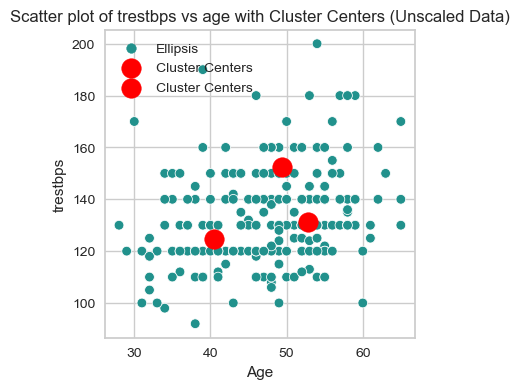

Ellipsis

In [24]:
# plot a scatter plot visualizing the 'trestbps' vs. 'age' along with the centers for the unscaled data
fig, ax = plt.subplots(figsize=(4,4))


# Scatter plot with clusters
scatter = sns.scatterplot(x='age', y='trestbps', hue='clusters', data=df, palette='viridis', ax=ax)

# Add cluster centers
centers_scatter = ax.scatter(centers_df['age'], centers_df['trestbps'], marker='o', s=200, c='red', label='Cluster Centers')

# Set labels and title
ax.set_title('Scatter plot of trestbps vs age with Cluster Centers (Unscaled Data)')
ax.set_xlabel('Age')
ax.set_ylabel('trestbps')

# Add legend
handles, labels = scatter.get_legend_handles_labels()
handles.append(centers_scatter)
labels.append('Cluster Centers')
ax.legend(handles=handles, labels=labels)

# Show plot
plt.show()


...

Counter({1: 127, 2: 97, 0: 46})


Text(0.5, 1.0, 'Cluster size distribution')

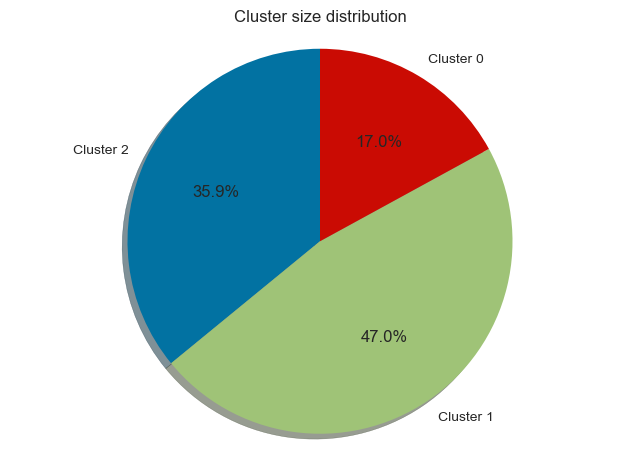

In [21]:
# plot a pie plot to show the cluster size distribution. (Code is written already here)
from collections import Counter
counts = Counter(kmeans.labels_)
print(counts)
fig1, ax1 = plt.subplots()
ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Cluster size distribution')

**Note:** Clusters are not really balanced, one cluster takes half of the patients.

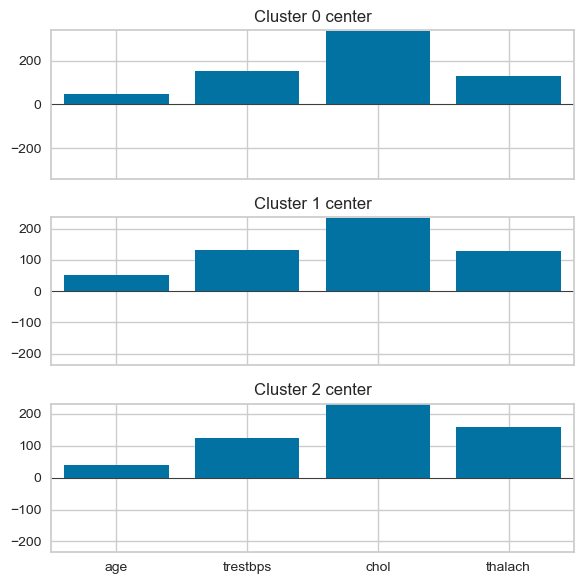

In [26]:
import numpy as np

# Plotting the cluster centers with the principal components
f, axes = plt.subplots(kmeans.n_clusters, 1, figsize=(6, 6), sharex=True)

for i, ax in enumerate(axes):
    center = centers_scaled[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.bar(range(len(center)), center, color=colors)
    ax.set_title("Cluster {} center".format(i))
    ax.axhline(0, color='black', lw=0.5)
    ax.set_xlim(-0.5, len(center) - 0.5)
    ax.set_ylim(-maxPC, maxPC)
    ax.set_xticks(range(len(df.columns[:-1])))
    ax.set_xticklabels(df.columns[:-1])
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


**Note:** Typically, it is adviced to back transform the centers to original scale. It seems to me that leaving them on the standard scales helps interpretation.

For example, in the plot above, _Cluster 0_ contains patients with age well bellow the average -> young individuals; _Cluster 1_ on the other hand has patients with age well above average -> older individuals. Finally, _Cluster 2_ has average age patients with high cholesterol and high blood pressure.

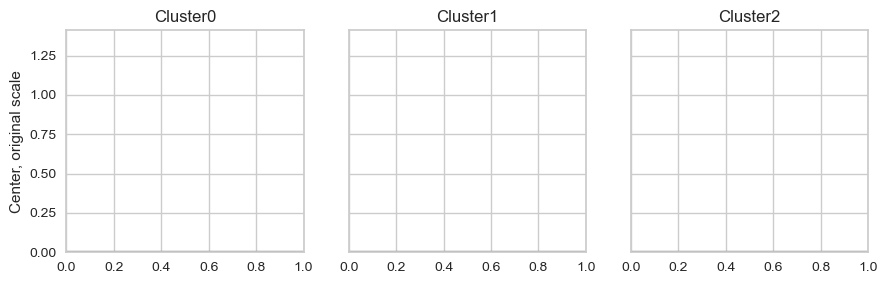

In [27]:
# Create subplots of all the features in each cluster using the unscaled data centers.

f, axes = plt.subplots(1, kmeans.n_clusters, figsize=(9, 3), sharey=True)

overall_max = centers.max().max()

for i, ax in enumerate(axes):
    center = ...

    colors = ...
    ax.axhline(color='#888888')
    ...
    ax.set_title(f'Cluster{i}')
    ax.set_ylim(0, 1.1*overall_max)
    if i == 0:
        ax.set_ylabel('Center, original scale')

plt.tight_layout()